In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle5 as pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Replace the path with the path to the data folder before running
train_data = pickle.load(open('../data/train.pkl', 'rb'))
test_data = pickle.load(open('../data/test.pkl', 'rb'))

np.random.shuffle(train_data)
train_data = train_data.reshape((16, len(train_data)//16, 2))
train_data = np.array([ train_data[i][train_data[i][:,0].argsort()] for i in range(len(train_data)) ])

train_sets_X, train_sets_Y = train_data[:,:,0], train_data[:,:,1]
test_sets_X, test_sets_Y = test_data[:,0], test_data[:,1]

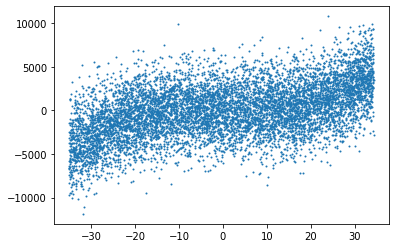

In [3]:
plt.scatter(train_sets_X, train_sets_Y, s=1)

In [4]:
def regression(test_x, x, y, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    x = np.array([poly.fit_transform(x[i].reshape(-1, 1)) for i in range(len(x))])
    test_x = poly.fit_transform(test_x.reshape(-1, 1))

    regs = [ LinearRegression() for i in range(len(x)) ]
    regs = [ regs[i].fit(x[i], y[i]) for i in range(len(x)) ]
    predicted_y = [ regs[i].predict(test_x) for i in range(len(x)) ]
    return predicted_y

poly_y = [ regression(test_sets_X, train_sets_X, train_sets_Y, i) for i in range(1,16) ]

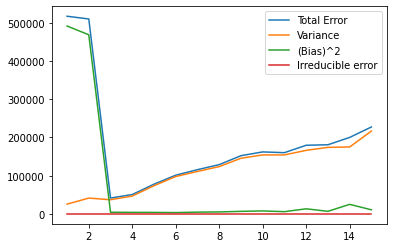

In [5]:
error = np.array(poly_y) - np.array(test_sets_Y)
mse = np.mean(np.square(error), axis=2)
average_mse = np.mean(mse, axis=1)

# Computing Variance
Expected_predicted_value = np.mean(poly_y, axis = 1)
square_difference = np.square([ np.array(poly_y[i]) - Expected_predicted_value[i] for i in range(len(poly_y)) ])
variance = np.mean(square_difference, axis=2)
average_variance = np.mean(variance, axis=1)

# Computing Bias
bias_squared = (Expected_predicted_value - test_sets_Y)**2
average_bias_squared = np.mean(bias_squared, axis=1)

# Computing Irreducible error
irreducible_error = mse - variance - np.transpose([average_bias_squared] * 16)
average_irreducible_error = average_mse - average_variance - average_bias_squared

plt.plot(range(1,16), average_mse, label='Total Error')
plt.plot(range(1,16), average_variance, label='Variance')
plt.plot(range(1,16), average_bias_squared, label='(Bias)^2')
plt.plot(range(1,16), average_irreducible_error, label='Irreducible error')
plt.legend()
plt.show()

In [6]:
# Displaying variance for all models and their corresponding degree
# Y axis is the degree of the polynomial
# X axis is the model number
df = pd.DataFrame(variance, index=range(1,16), columns=range(1,17))
df.style

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,34891.829441,562.341177,45744.632088,45760.458238,20304.586745,16305.452649,13010.472846,7093.706253,9617.182828,14301.956729,19313.143449,8321.074027,6867.625539,44732.130841,85326.136410,36843.489964
2,35087.397731,12625.966978,57849.461887,48494.975347,106886.270393,22385.317561,14850.990690,6462.574691,9784.153106,21116.807528,23911.374931,51654.950241,68259.487933,44282.596413,97508.986860,40996.580956
3,48673.734044,22567.085855,74690.057687,46360.277043,55667.710642,14410.885023,53171.726841,1121.824928,8866.135646,27968.596496,28982.392764,23227.589257,12722.546048,77688.042926,60987.717451,36072.680682
4,50720.400710,24598.107854,71355.028718,58910.049175,57863.635015,17751.171757,67220.291527,3435.249646,9731.451405,36312.568378,76068.362464,51540.651230,20043.676243,89640.693048,75079.288551,36374.226803
5,52146.261760,58331.875169,119239.807447,59810.928259,55680.384228,108263.969372,100038.913435,53237.148020,13842.063280,115171.404238,75306.917203,100069.882512,63590.519201,93118.854033,78187.011388,34855.697526
6,54745.136271,63016.757269,116249.053986,59163.757013,100789.090952,134346.232478,98145.051465,60032.407386,19918.636305,118110.580004,95209.595660,349555.425828,69944.550979,93251.386484,87964.075409,43807.089209
7,53925.480480,74711.395042,111718.825591,66664.365080,97011.147381,172380.042736,136804.948083,61201.091655,35823.345777,134879.522682,103473.529495,340222.260021,68186.982291,93055.059560,101212.422521,125812.752988
8,52260.007817,76080.721108,115717.572093,74506.072946,100311.705289,176499.907360,204269.063296,75382.299875,42772.583891,187382.131284,103598.832295,378597.707889,73602.286978,94768.219094,98564.581934,125353.461777
9,87709.116613,80412.600797,109479.457847,103657.001873,137785.705380,195538.433145,196462.022039,88934.138945,73077.369299,210375.917955,208750.157172,398288.683692,83079.494480,105973.239933,113723.118130,136766.864868
10,93039.278646,78352.271243,95467.234657,172368.063673,128698.591223,189520.944288,193831.620772,96117.806444,72975.679989,207337.125116,209964.482541,375236.710476,76276.901064,107251.434901,206606.672261,165879.588546


In [15]:
# Tabulating average bias^2 and average variance for all degrees
dict = {
    'Average Variance': average_variance,
    'Average (Bias^2)': average_bias_squared,
}
df2 = pd.DataFrame(dict, index=range(1,16))
df2.style

,Average Variance,Average (Bias^2)
1,25562.263702,491424.801320
2,41384.868328,468487.814864
3,37073.687708,4383.324200
4,46665.303283,4045.148777
5,73805.727317,3972.543726
6,97765.551669,3488.051853
7,111067.698211,4664.766689
8,123729.197183,5166.730640
9,145625.832636,6688.133326
10,154307.775365,7828.803863


In [13]:
df3 = pd.DataFrame(average_irreducible_error, index=range(1,16), columns=['Irreducible error'])
df3.style

,Irreducible error
1,-0.000000
2,0.000000
3,-0.000000
4,-0.000000
5,0.000000
6,-0.000000
7,-0.000000
8,-0.000000
9,0.000000
10,0.000000


In [25]:
for i in range(len(average_irreducible_error)):
    print(f"Degree {i+1}:  Error {average_irreducible_error[i]}")

Degree 1:  Error -5.820766091346741e-11
Degree 2:  Error 5.820766091346741e-11
Degree 3:  Error -5.4569682106375694e-12
Degree 4:  Error -4.547473508864641e-12
Degree 5:  Error 1.4551915228366852e-11
Degree 6:  Error -1.000444171950221e-11
Degree 7:  Error -1.9099388737231493e-11
Degree 8:  Error -8.185452315956354e-12
Degree 9:  Error 1.8189894035458565e-12
Degree 10:  Error 4.638422979041934e-11
Degree 11:  Error -3.456079866737127e-11
Degree 12:  Error 2.000888343900442e-11
Degree 13:  Error 0.0
Degree 14:  Error 3.637978807091713e-11
Degree 15:  Error -3.456079866737127e-11
